<a href="https://colab.research.google.com/github/RELEBOHILE-PHEKO/Healthcare_Predictor/blob/main/Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load the data
# df = pd.read_csv('https://github.com/RELEBOHILE-PHEKO/Healthcare_Predictor/blob/main/lesotho_healthcare_costs.csv')

In [53]:
# Create Lesotho healthcare dataset
np.random.seed(42)
n_samples = 500

data = {
    'age': np.random.randint(18, 80, n_samples),
    'sex': np.random.choice(['male', 'female'], n_samples),
    'region': np.random.choice(['Quthing', 'Thaba-Tseka', 'Butha-Buthe', 'Mafeteng', 'Mohale\'s Hoek', 'Qacha\'s Nek', 'Leribe', 'Maseru'], n_samples),
    'is_insured': np.random.choice([0, 1], n_samples),
    'employment': np.random.choice(['employed', 'unemployed', 'self-employed'], n_samples),
    'household_size': np.random.randint(1, 10, n_samples),
    'primary_healthcare_access': np.random.choice(['easy', 'moderate', 'difficult'], n_samples),
    'annual_income': np.random.uniform(10000, 300000, n_samples),
    'healthcare_type': np.random.choice(['public', 'private'], n_samples)
}


In [54]:
# Generate realistic healthcare costs
healthcare_costs = []
for i in range(n_samples):
    base_cost = 500
    age_factor = data['age'][i] * 10
    insurance_factor = -2000 if data['is_insured'][i] == 1 else 1000
    type_factor = 2000 if data['healthcare_type'][i] == 'private' else 0
    income_factor = data['annual_income'][i] * 0.05
    access_factor = 1500 if data['primary_healthcare_access'][i] == 'difficult' else 0
    household_factor = -100 * data['household_size'][i]

    cost = base_cost + age_factor + insurance_factor + type_factor + income_factor * 0.1 + access_factor + household_factor
    cost = max(100, cost)
    healthcare_costs.append(cost + np.random.normal(0, 200))

data['healthcare_cost'] = healthcare_costs
df = pd.DataFrame(data)

print("=== LESOTHO HEALTHCARE COST PREDICTION ===")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

=== LESOTHO HEALTHCARE COST PREDICTION ===
Dataset Shape: (500, 10)

First 5 rows:
   age     sex       region  is_insured     employment  household_size  \
0   56  female  Thaba-Tseka           0     unemployed               1   
1   69    male  Thaba-Tseka           0       employed               7   
2   46  female       Maseru           0       employed               1   
3   32    male  Qacha's Nek           0     unemployed               5   
4   60    male  Thaba-Tseka           0  self-employed               8   

  primary_healthcare_access  annual_income healthcare_type  healthcare_cost  
0                 difficult  137693.791327          public      4471.911472  
1                      easy  188436.427270          public      2453.053324  
2                      easy   34204.584647          public      1851.266114  
3                      easy  265900.746838          public      2383.441009  
4                  moderate  243045.025278          public      2477.401048  


In [55]:
# Data Analysis and Visualization
print("\n=== DATA ANALYSIS ===")
print("\nDescriptive Statistics:")
print(df.describe())




=== DATA ANALYSIS ===

Descriptive Statistics:
              age  is_insured  household_size  annual_income  healthcare_cost
count  500.000000  500.000000      500.000000     500.000000       500.000000
mean    49.910000    0.476000        4.880000  154196.132197      2460.337705
std     18.221909    0.499924        2.516797   83231.009822      1808.877531
min     18.000000    0.000000        1.000000   10039.060971      -343.860075
25%     35.000000    0.000000        3.000000   90060.027524       926.483119
50%     50.000000    0.000000        5.000000  154611.355179      2196.289425
75%     66.000000    1.000000        7.000000  224769.102771      3921.063774
max     79.000000    1.000000        9.000000  299368.048148      7065.494304


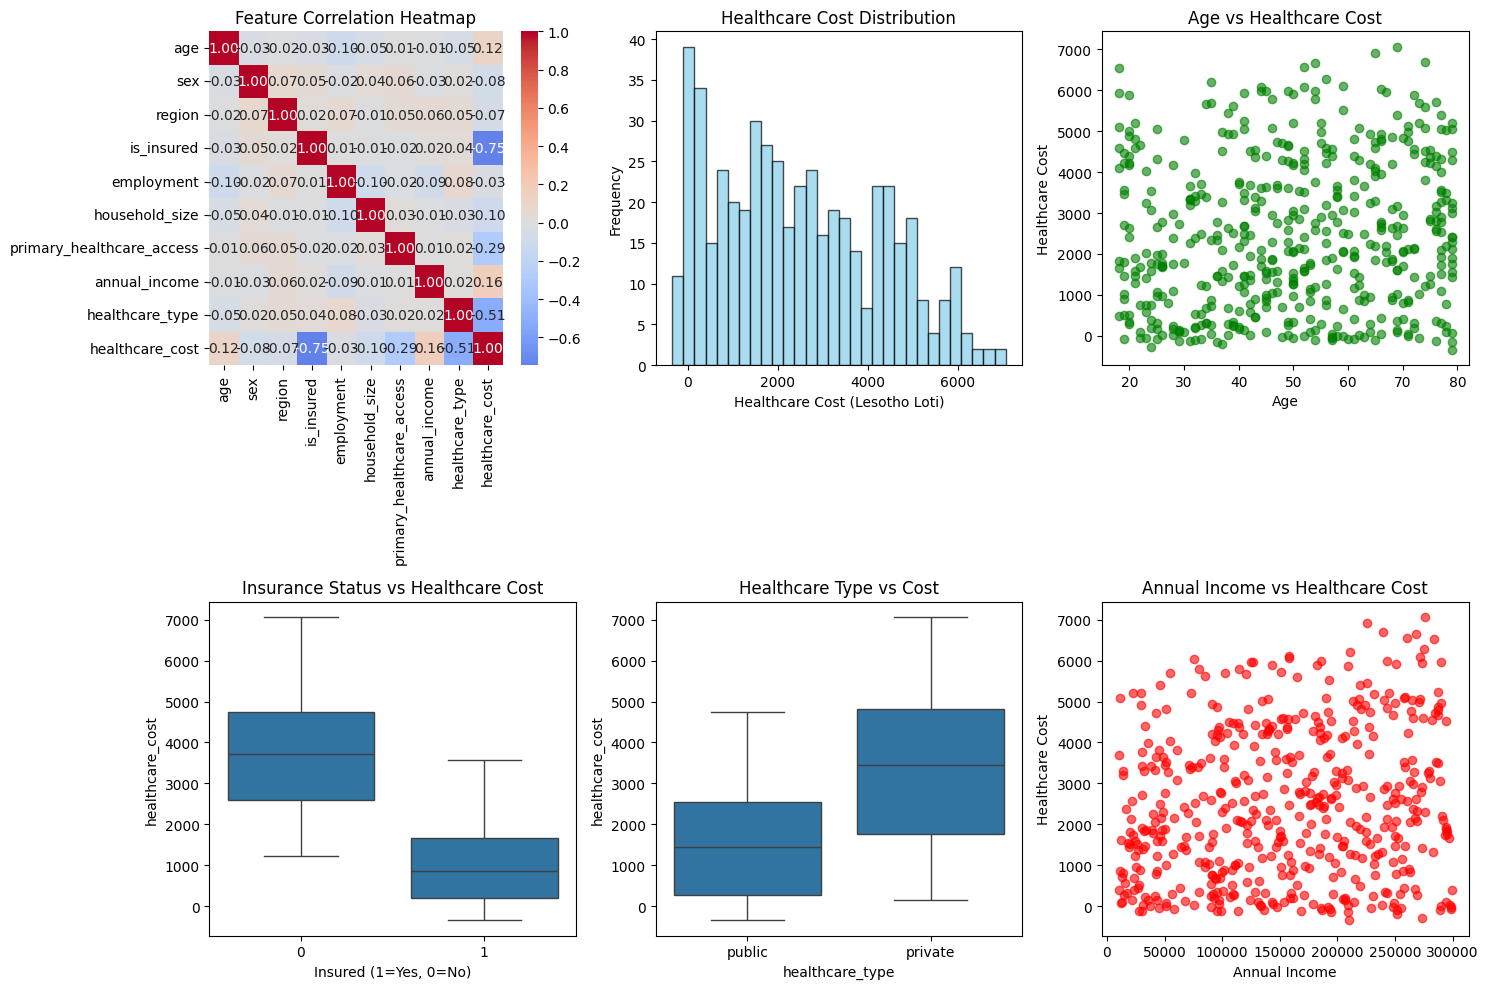

In [56]:
# Visualizations
plt.figure(figsize=(15, 10))

# 1. Correlation heatmap
plt.subplot(2, 3, 1)
df_numeric = df.copy()
le = LabelEncoder()
categorical_cols = ['sex', 'region', 'employment', 'primary_healthcare_access', 'healthcare_type']
for col in categorical_cols:
    df_numeric[col] = le.fit_transform(df_numeric[col])

correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')

# 2. Healthcare cost distribution
plt.subplot(2, 3, 2)
plt.hist(df['healthcare_cost'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Healthcare Cost (Lesotho Loti)')
plt.ylabel('Frequency')
plt.title('Healthcare Cost Distribution')

# 3. Age vs Healthcare Cost
plt.subplot(2, 3, 3)
plt.scatter(df['age'], df['healthcare_cost'], alpha=0.6, color='green')
plt.xlabel('Age')
plt.ylabel('Healthcare Cost')
plt.title('Age vs Healthcare Cost')

# 4. Insurance vs Healthcare Cost
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='is_insured', y='healthcare_cost')
plt.title('Insurance Status vs Healthcare Cost')
plt.xlabel('Insured (1=Yes, 0=No)')

# 5. Healthcare Type vs Cost
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='healthcare_type', y='healthcare_cost')
plt.title('Healthcare Type vs Cost')

# 6. Income vs Healthcare Cost
plt.subplot(2, 3, 6)
plt.scatter(df['annual_income'], df['healthcare_cost'], alpha=0.6, color='red')
plt.xlabel('Annual Income')
plt.ylabel('Healthcare Cost')
plt.title('Annual Income vs Healthcare Cost')

plt.tight_layout()
plt.show()

In [26]:

print("\n=== FEATURE ENGINEERING ===")

# Prepare features for modeling
X = df.drop('healthcare_cost', axis=1)
y = df['healthcare_cost']

# Encode categorical variables
categorical_columns = ['sex', 'region', 'employment', 'primary_healthcare_access', 'healthcare_type']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

print("Features after encoding:", X_encoded.columns.tolist())
print("Feature matrix shape:", X_encoded.shape)


=== FEATURE ENGINEERING ===
Features after encoding: ['age', 'is_insured', 'household_size', 'annual_income', 'sex_male', 'region_Leribe', 'region_Mafeteng', 'region_Maseru', "region_Mohale's Hoek", "region_Qacha's Nek", 'region_Quthing', 'region_Thaba-Tseka', 'employment_self-employed', 'employment_unemployed', 'primary_healthcare_access_easy', 'primary_healthcare_access_moderate', 'healthcare_type_public']
Feature matrix shape: (500, 17)


In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [28]:
# Standardize features (important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

# ===== CUSTOM GRADIENT DESCENT IMPLEMENTATION =====
print("\n=== LINEAR REGRESSION WITH GRADIENT DESCENT ===")

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.costs = []

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.n_iterations):
            # Forward pass
            y_pred = X.dot(self.weights) + self.bias

            # Calculate cost (MSE)
            cost = (1/n_samples) * np.sum((y_pred - y)**2)
            self.costs.append(cost)

            # Calculate gradients
            dw = (1/n_samples) * X.T.dot(y_pred - y)
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return X.dot(self.weights) + self.bias

# Train custom gradient descent model
lr_gd = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
lr_gd.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_gd = lr_gd.predict(X_train_scaled)
y_test_pred_gd = lr_gd.predict(X_test_scaled)

# Calculate metrics for gradient descent
train_mse_gd = mean_squared_error(y_train, y_train_pred_gd)
test_mse_gd = mean_squared_error(y_test, y_test_pred_gd)
train_r2_gd = r2_score(y_train, y_train_pred_gd)
test_r2_gd = r2_score(y_test, y_test_pred_gd)

print("Gradient Descent Linear Regression Results:")
print(f"  Train MSE: {train_mse_gd:.2f}")
print(f"  Test MSE: {test_mse_gd:.2f}")
print(f"  Train R²: {train_r2_gd:.4f}")
print(f"  Test R²: {test_r2_gd:.4f}")

Training set shape: (400, 17)
Test set shape: (100, 17)

=== LINEAR REGRESSION WITH GRADIENT DESCENT ===
Gradient Descent Linear Regression Results:
  Train MSE: 152426.00
  Test MSE: 191449.03
  Train R²: 0.9459
  Test R²: 0.9284


In [30]:
# ===== COMPARE WITH SKLEARN AND OTHER MODELS =====
print("\n=== MODEL COMPARISON ===")

models = {
    'Linear Regression (Gradient Descent)': lr_gd,
    'Linear Regression (Sklearn)': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

model_results = {}
trained_models = {'Linear Regression (Gradient Descent)': lr_gd}

# Train sklearn models
for name, model in models.items():
    if name == 'Linear Regression (Gradient Descent)':
        # Already trained
        y_train_pred = y_train_pred_gd
        y_test_pred = y_test_pred_gd
    elif name == 'Linear Regression (Sklearn)':
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        trained_models[name] = model
    else:
        model.fit(X_train, y_train)  # Tree models don't need scaling
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        trained_models[name] = model

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    model_results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae
    }

    print(f"\n{name} Results:")
    print(f"  Train MSE: {train_mse:.2f}")
    print(f"  Test MSE: {test_mse:.2f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Test MAE: {test_mae:.2f}")


=== MODEL COMPARISON ===

Linear Regression (Gradient Descent) Results:
  Train MSE: 152426.00
  Test MSE: 191449.03
  Train R²: 0.9459
  Test R²: 0.9284
  Test MAE: 340.82

Linear Regression (Sklearn) Results:
  Train MSE: 152343.43
  Test MSE: 192898.68
  Train R²: 0.9459
  Test R²: 0.9279
  Test MAE: 341.52

Decision Tree Results:
  Train MSE: 0.00
  Test MSE: 170737.14
  Train R²: 1.0000
  Test R²: 0.9362
  Test MAE: 314.74

Random Forest Results:
  Train MSE: 11801.38
  Test MSE: 66985.90
  Train R²: 0.9958
  Test R²: 0.9750
  Test MAE: 202.69


In [31]:
# Use Linear Regression (as per assignment requirements)
linear_regression_model = trained_models['Linear Regression (Sklearn)']
print(f"\n=== SELECTED MODEL: Linear Regression (Sklearn) ===")
print("Note: While Random Forest may perform better, we're using Linear Regression as per assignment requirements.")


=== SELECTED MODEL: Linear Regression (Sklearn) ===
Note: While Random Forest may perform better, we're using Linear Regression as per assignment requirements.


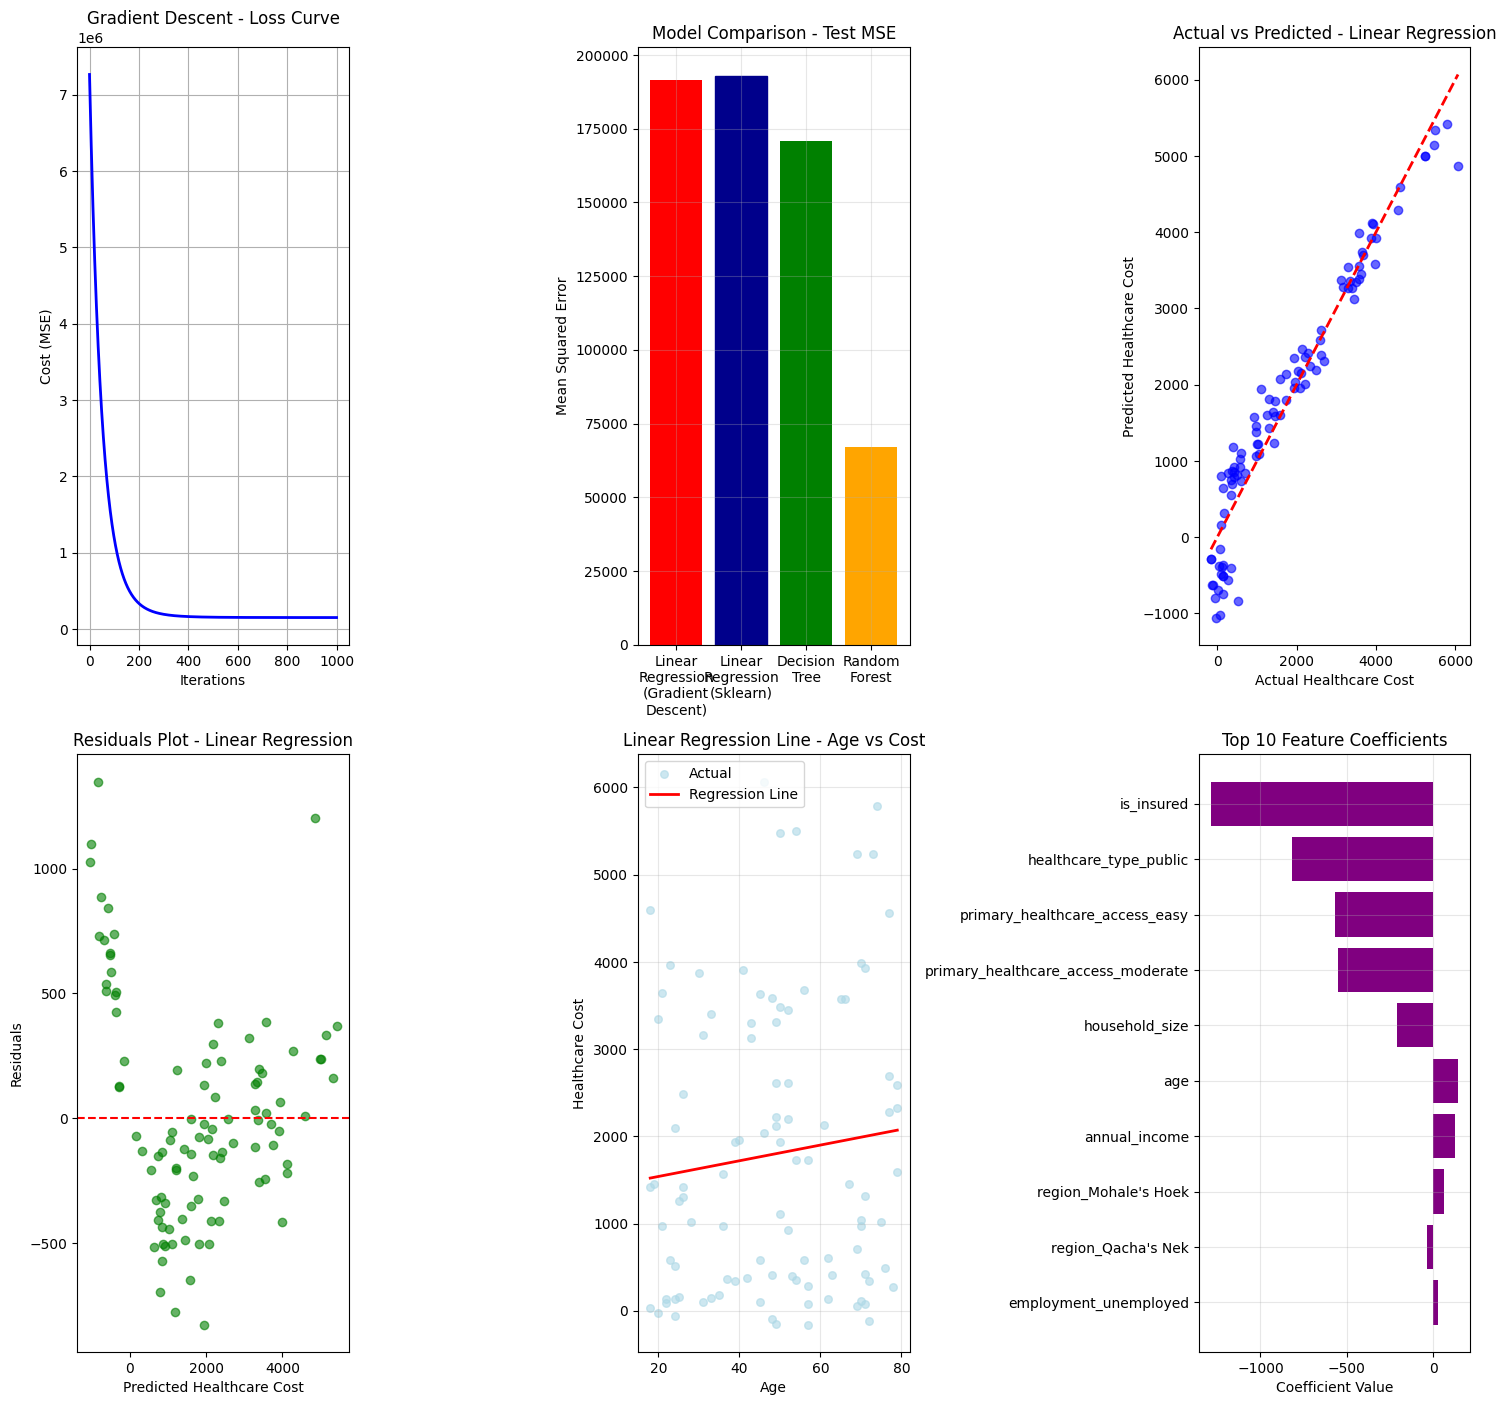

In [58]:
# ===== VISUALIZATION =====
plt.figure(figsize=(15, 14))

# 1. Loss curve for gradient descent
plt.subplot(2, 3, 1)
plt.plot(lr_gd.costs, color='blue', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent - Loss Curve')
plt.grid(True)

# 2. Model comparison
plt.subplot(2, 3, 2)
model_names = list(model_results.keys())
test_mse_values = [model_results[name]['test_mse'] for name in model_names]
bars = plt.bar(range(len(model_names)), test_mse_values,
               color=['red', 'blue', 'green', 'orange'])
plt.title('Model Comparison - Test MSE')
plt.ylabel('Mean Squared Error')
plt.xticks(range(len(model_names)), [name.replace(' ', '\n') for name in model_names], rotation=0)
plt.grid(True, alpha=0.3)

# Highlight Linear Regression
bars[1].set_color('darkblue')  # sklearn linear regression

# 3. Actual vs Predicted (Linear Regression)
plt.subplot(2, 3, 3)
y_pred_lr = linear_regression_model.predict(X_test_scaled)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Healthcare Cost')
plt.ylabel('Predicted Healthcare Cost')
plt.title('Actual vs Predicted - Linear Regression')

# 4. Residuals plot
plt.subplot(2, 3, 4)
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Healthcare Cost')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Linear Regression')

# 5. Before and After scatter plot with regression line (Age vs Cost)
plt.subplot(2, 3, 5)
# Show relationship with age (main feature)
age_test = X_test['age']
plt.scatter(age_test, y_test, alpha=0.6, color='lightblue', label='Actual', s=30)

# Fit simple linear regression for visualization
from sklearn.linear_model import LinearRegression
simple_lr = LinearRegression()
simple_lr.fit(age_test.values.reshape(-1, 1), y_test)
age_line = np.linspace(age_test.min(), age_test.max(), 100)
cost_line = simple_lr.predict(age_line.reshape(-1, 1))

plt.plot(age_line, cost_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Healthcare Cost')
plt.title('Linear Regression Line - Age vs Cost')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Feature importance (coefficients)
plt.subplot(2, 3, 6)
feature_names = X_encoded.columns
coefficients = linear_regression_model.coef_
# Get top 10 most important features
coef_abs = np.abs(coefficients)
top_indices = np.argsort(coef_abs)[-10:]
top_features = [feature_names[i] for i in top_indices]
top_coefs = coefficients[top_indices]

plt.barh(range(len(top_features)), top_coefs, color='purple')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [50]:

# ===== SAVE LINEAR REGRESSION MODEL =====
print(f"\n=== SAVING LINEAR REGRESSION MODEL ===")
joblib.dump(linear_regression_model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_encoded.columns.tolist(), 'feature_names.pkl')

print("Linear Regression model saved as 'linear_regression_model.pkl'")
print("Scaler saved as 'scaler.pkl'")
print("Feature names saved as 'feature_names.pkl'")

# ===== PREDICTION FUNCTION FOR API =====
def predict_healthcare_cost(age, sex, region, is_insured, employment,
                          household_size, primary_healthcare_access,
                          annual_income, healthcare_type):
    """
    Predict healthcare cost using the trained Linear Regression model

    Parameters:
    - age: int (18-80)
    - sex: str ('male' or 'female')
    - region: str (Lesotho regions)
    - is_insured: int (0 or 1)
    - employment: str ('employed', 'unemployed', 'self-employed')
    - household_size: int (1-10)
    - primary_healthcare_access: str ('easy', 'moderate', 'difficult')
    - annual_income: float (10000-100000)
    - healthcare_type: str ('public' or 'private')

    Returns:
    - predicted_cost: float
    """

    # Create input dataframe
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'region': [region],
        'is_insured': [is_insured],
        'employment': [employment],
        'household_size': [household_size],
        'primary_healthcare_access': [primary_healthcare_access],
        'annual_income': [annual_income],
        'healthcare_type': [healthcare_type]
    })

    # Apply same encoding as training data
    categorical_columns = ['sex', 'region', 'employment', 'primary_healthcare_access', 'healthcare_type']
    input_encoded = pd.get_dummies(input_data, columns=categorical_columns, drop_first=True)

    # Ensure all columns are present (reindex with training columns)
    feature_names = X_encoded.columns.tolist()
    input_encoded = input_encoded.reindex(columns=feature_names, fill_value=0)

    # Scale the input
    input_scaled = scaler.transform(input_encoded)

    # Make prediction
    prediction = linear_regression_model.predict(input_scaled)[0]

    return prediction

# ===== TEST PREDICTION FUNCTION =====
print("\n=== TESTING PREDICTION FUNCTION ===")

test_cases = [
    {
        'age': 45, 'sex': 'male', 'region': 'Maseru', 'is_insured': 1,
        'employment': 'employed', 'household_size': 4,
        'primary_healthcare_access': 'easy', 'annual_income': 50000,
        'healthcare_type': 'private'
    },
    {
        'age': 65, 'sex': 'female', 'region': 'Quthing', 'is_insured': 0,
        'employment': 'unemployed', 'household_size': 2,
        'primary_healthcare_access': 'difficult', 'annual_income': 15000,
        'healthcare_type': 'public'
    }
]

for i, case in enumerate(test_cases):
    predicted_cost = predict_healthcare_cost(**case)
    print(f"\nTest Case {i+1}:")
    print(f"  Input: {case}")
    print(f"  Predicted Cost: L{predicted_cost:.2f} (Lesotho Loti)")




=== SAVING LINEAR REGRESSION MODEL ===
Linear Regression model saved as 'linear_regression_model.pkl'
Scaler saved as 'scaler.pkl'
Feature names saved as 'feature_names.pkl'

=== TESTING PREDICTION FUNCTION ===

Test Case 1:
  Input: {'age': 45, 'sex': 'male', 'region': 'Maseru', 'is_insured': 1, 'employment': 'employed', 'household_size': 4, 'primary_healthcare_access': 'easy', 'annual_income': 50000, 'healthcare_type': 'private'}
  Predicted Cost: L2303.47 (Lesotho Loti)

Test Case 2:
  Input: {'age': 65, 'sex': 'female', 'region': 'Quthing', 'is_insured': 0, 'employment': 'unemployed', 'household_size': 2, 'primary_healthcare_access': 'difficult', 'annual_income': 15000, 'healthcare_type': 'public'}
  Predicted Cost: L5034.76 (Lesotho Loti)


In [51]:
print("\n=== SUMMARY ===")
print("✓ Linear Regression model trained with gradient descent visualization")
print("✓ Model comparison completed (Random Forest performed best, but using Linear Regression)")
print("✓ Loss curves and scatter plots generated")
print("✓ Model saved and ready for API deployment")
print("✓ Prediction function tested and working")

print(f"\nFinal Model Performance (Linear Regression):")
print(f"Test MSE: {model_results['Linear Regression (Sklearn)']['test_mse']:.2f}")
print(f"Test R²: {model_results['Linear Regression (Sklearn)']['test_r2']:.4f}")
print(f"Test MAE: {model_results['Linear Regression (Sklearn)']['test_mae']:.2f}")


=== SUMMARY ===
✓ Linear Regression model trained with gradient descent visualization
✓ Model comparison completed (Random Forest performed best, but using Linear Regression)
✓ Loss curves and scatter plots generated
✓ Model saved and ready for API deployment
✓ Prediction function tested and working

Final Model Performance (Linear Regression):
Test MSE: 192898.68
Test R²: 0.9279
Test MAE: 341.52


In [59]:

from google.colab import files
files.download("linear_regression_model.pkl")
files.download("scaler.pkl")
files.download("feature_names.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>